<a href="https://colab.research.google.com/github/mateusribeirocampos/diollm/blob/main/Facial_recognition_using_Keras_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto de reconhecimento facial

Importação dos frameworks e bibliotecas


In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tqdm.notebook import tqdm
import cv2
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

warnings.filterwarnings('ignore')
%matplotlib inline

## Carregar o dataset



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Caminhos
input_base = "/content/drive/MyDrive/Cleaned_Dataset"
output_base = "/content/drive/MyDrive/actors_bbt_split"

# Cria pastas de treino e teste
os.makedirs(os.path.join(output_base, "train"), exist_ok=True)
os.makedirs(os.path.join(output_base, "test"), exist_ok=True)

# Para cada classe (howard, leonard...)
for class_name in os.listdir(input_base):
    class_dir = os.path.join(input_base, class_name)
    if not os.path.isdir(class_dir):
        continue

    # Lista todas as imagens da classe
    all_images = os.listdir(class_dir)
    train_images, test_images = train_test_split(all_images, test_size=0.2, random_state=42)

    # Copia para treino
    train_dir = os.path.join(output_base, "train", class_name)
    os.makedirs(train_dir, exist_ok=True)
    for img in train_images:
        src = os.path.join(class_dir, img)
        dst = os.path.join(train_dir, img)
        shutil.copy(src, dst)

    # Copia para teste
    test_dir = os.path.join(output_base, "test", class_name)
    os.makedirs(test_dir, exist_ok=True)
    for img in test_images:
        src = os.path.join(class_dir, img)
        dst = os.path.join(test_dir, img)
        shutil.copy(src, dst)

print("Divisão concluída! Verifique a pasta actors_bbt_split no Drive.")

Divisão concluída! Verifique a pasta actors_bbt_split no Drive.


In [ ]:
!sudo apt-get install tree

In [4]:
!tree /content/drive/MyDrive/actors_bbt_split/ -d

/content/drive/MyDrive/actors_bbt_split/
├── test
│   ├── howard
│   ├── leonard
│   ├── raj
│   └── sheldon
└── train
    ├── howard
    ├── leonard
    ├── raj
    └── sheldon

10 directories


In [6]:
def check_class_distribution(directory):
    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):
            print(f"{class_name}: {len(os.listdir(class_path))} imagens")

print("\nDistribuição no treino:")
check_class_distribution(train_dir)

print("\nDistribuição no teste:")
check_class_distribution(test_dir)


Distribuição no treino:
raj: 56 imagens
sheldon: 140 imagens
leonard: 18 imagens
howard: 54 imagens

Distribuição no teste:
raj: 14 imagens
sheldon: 36 imagens
leonard: 5 imagens
howard: 14 imagens


In [5]:
train_dir = "/content/drive/MyDrive/actors_bbt_split/train/"
test_dir = "/content/drive/MyDrive/actors_bbt_split/test/"
print("Total training images:", len(os.listdir(train_dir)))
print("Total test images:", len(os.listdir(test_dir)))

Total training images: 4
Total test images: 4


In [7]:
def load_images(directory):
    images_paths = []
    labels = []
    for label in os.listdir(directory):
      for filename in os.listdir(directory+label):
        image_path = os.path.join(directory, label, filename)
        images_paths.append(image_path)
        labels.append(label)

      print(label, "loaded")

    return images_paths, labels

In [15]:
# Converter para dataframe
train = pd.DataFrame()
train['image'], train['label'] = load_images(train_dir)
# Embaralhar o datase
train = train.sample(frac=1).reset_index(drop=True)
train.head()

raj loaded
sheldon loaded
leonard loaded
howard loaded


image    label
0  /content/drive/MyDrive/actors_bbt_split/train/...  sheldon
1  /content/drive/MyDrive/actors_bbt_split/train/...  sheldon
2  /content/drive/MyDrive/actors_bbt_split/train/...  sheldon
3  /content/drive/MyDrive/actors_bbt_split/train/...  sheldon
4  /content/drive/MyDrive/actors_bbt_split/train/...  sheldon

## Arquivos analisados

Os arquivos foram analisados para verificar as imagens armazenadas

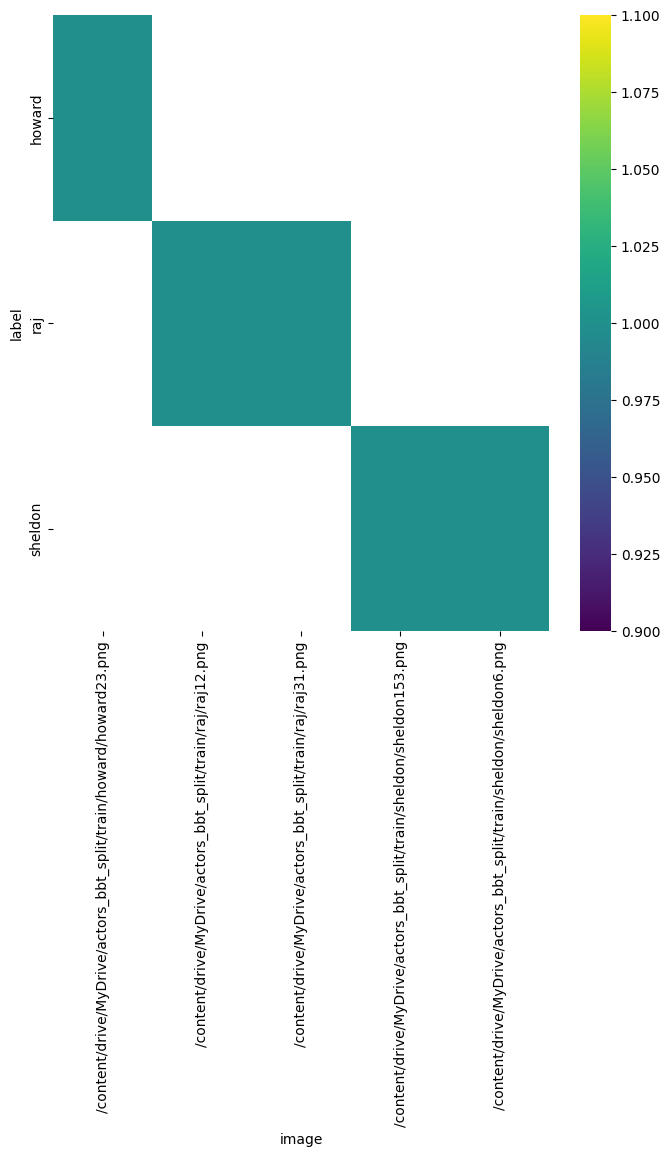

In [14]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['label'].value_counts()
    for x_label, grp in _df_14.groupby('image')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('image')
_ = plt.ylabel('label')

<Axes: xlabel='count', ylabel='label'>

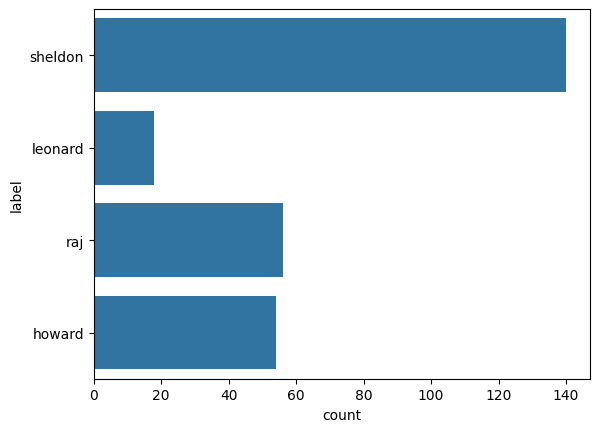

In [17]:
sns.countplot(train['label'])

In [16]:
# Converter para dataframe
test = pd.DataFrame()
test['image'], test['label'] = load_images(test_dir)
# Embaralhar o datase
test = test.sample(frac=1).reset_index(drop=True)
test.head()

raj loaded
sheldon loaded
leonard loaded
howard loaded


image    label
0  /content/drive/MyDrive/actors_bbt_split/test/r...      raj
1  /content/drive/MyDrive/actors_bbt_split/test/s...  sheldon
2  /content/drive/MyDrive/actors_bbt_split/test/s...  sheldon
3  /content/drive/MyDrive/actors_bbt_split/test/s...  sheldon
4  /content/drive/MyDrive/actors_bbt_split/test/s...  sheldon

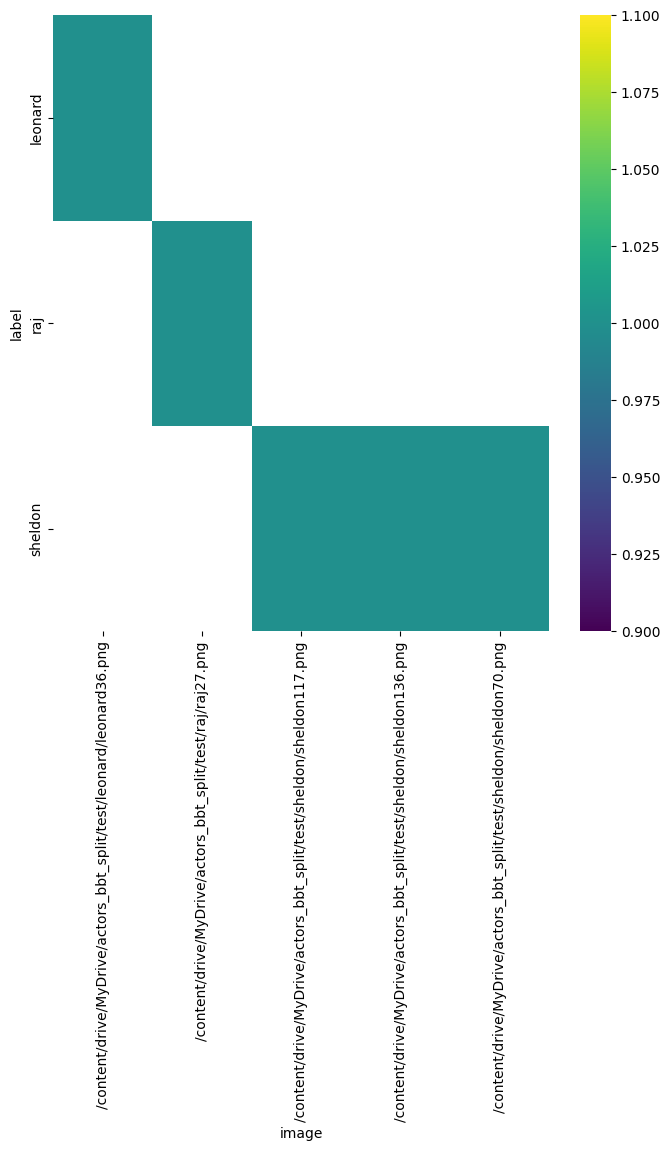

In [13]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['label'].value_counts()
    for x_label, grp in _df_20.groupby('image')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('image')
_ = plt.ylabel('label')

<Axes: xlabel='count', ylabel='label'>

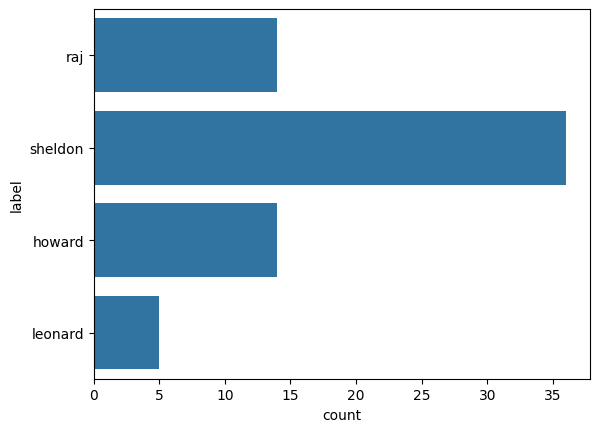

In [18]:
sns.countplot(test['label'])

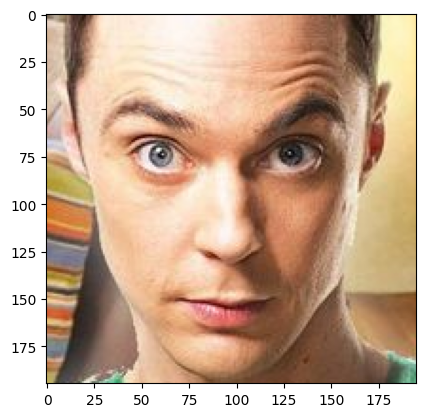

In [24]:
from PIL import Image
img = Image.open(train['image'][0])
plt.imshow(img)

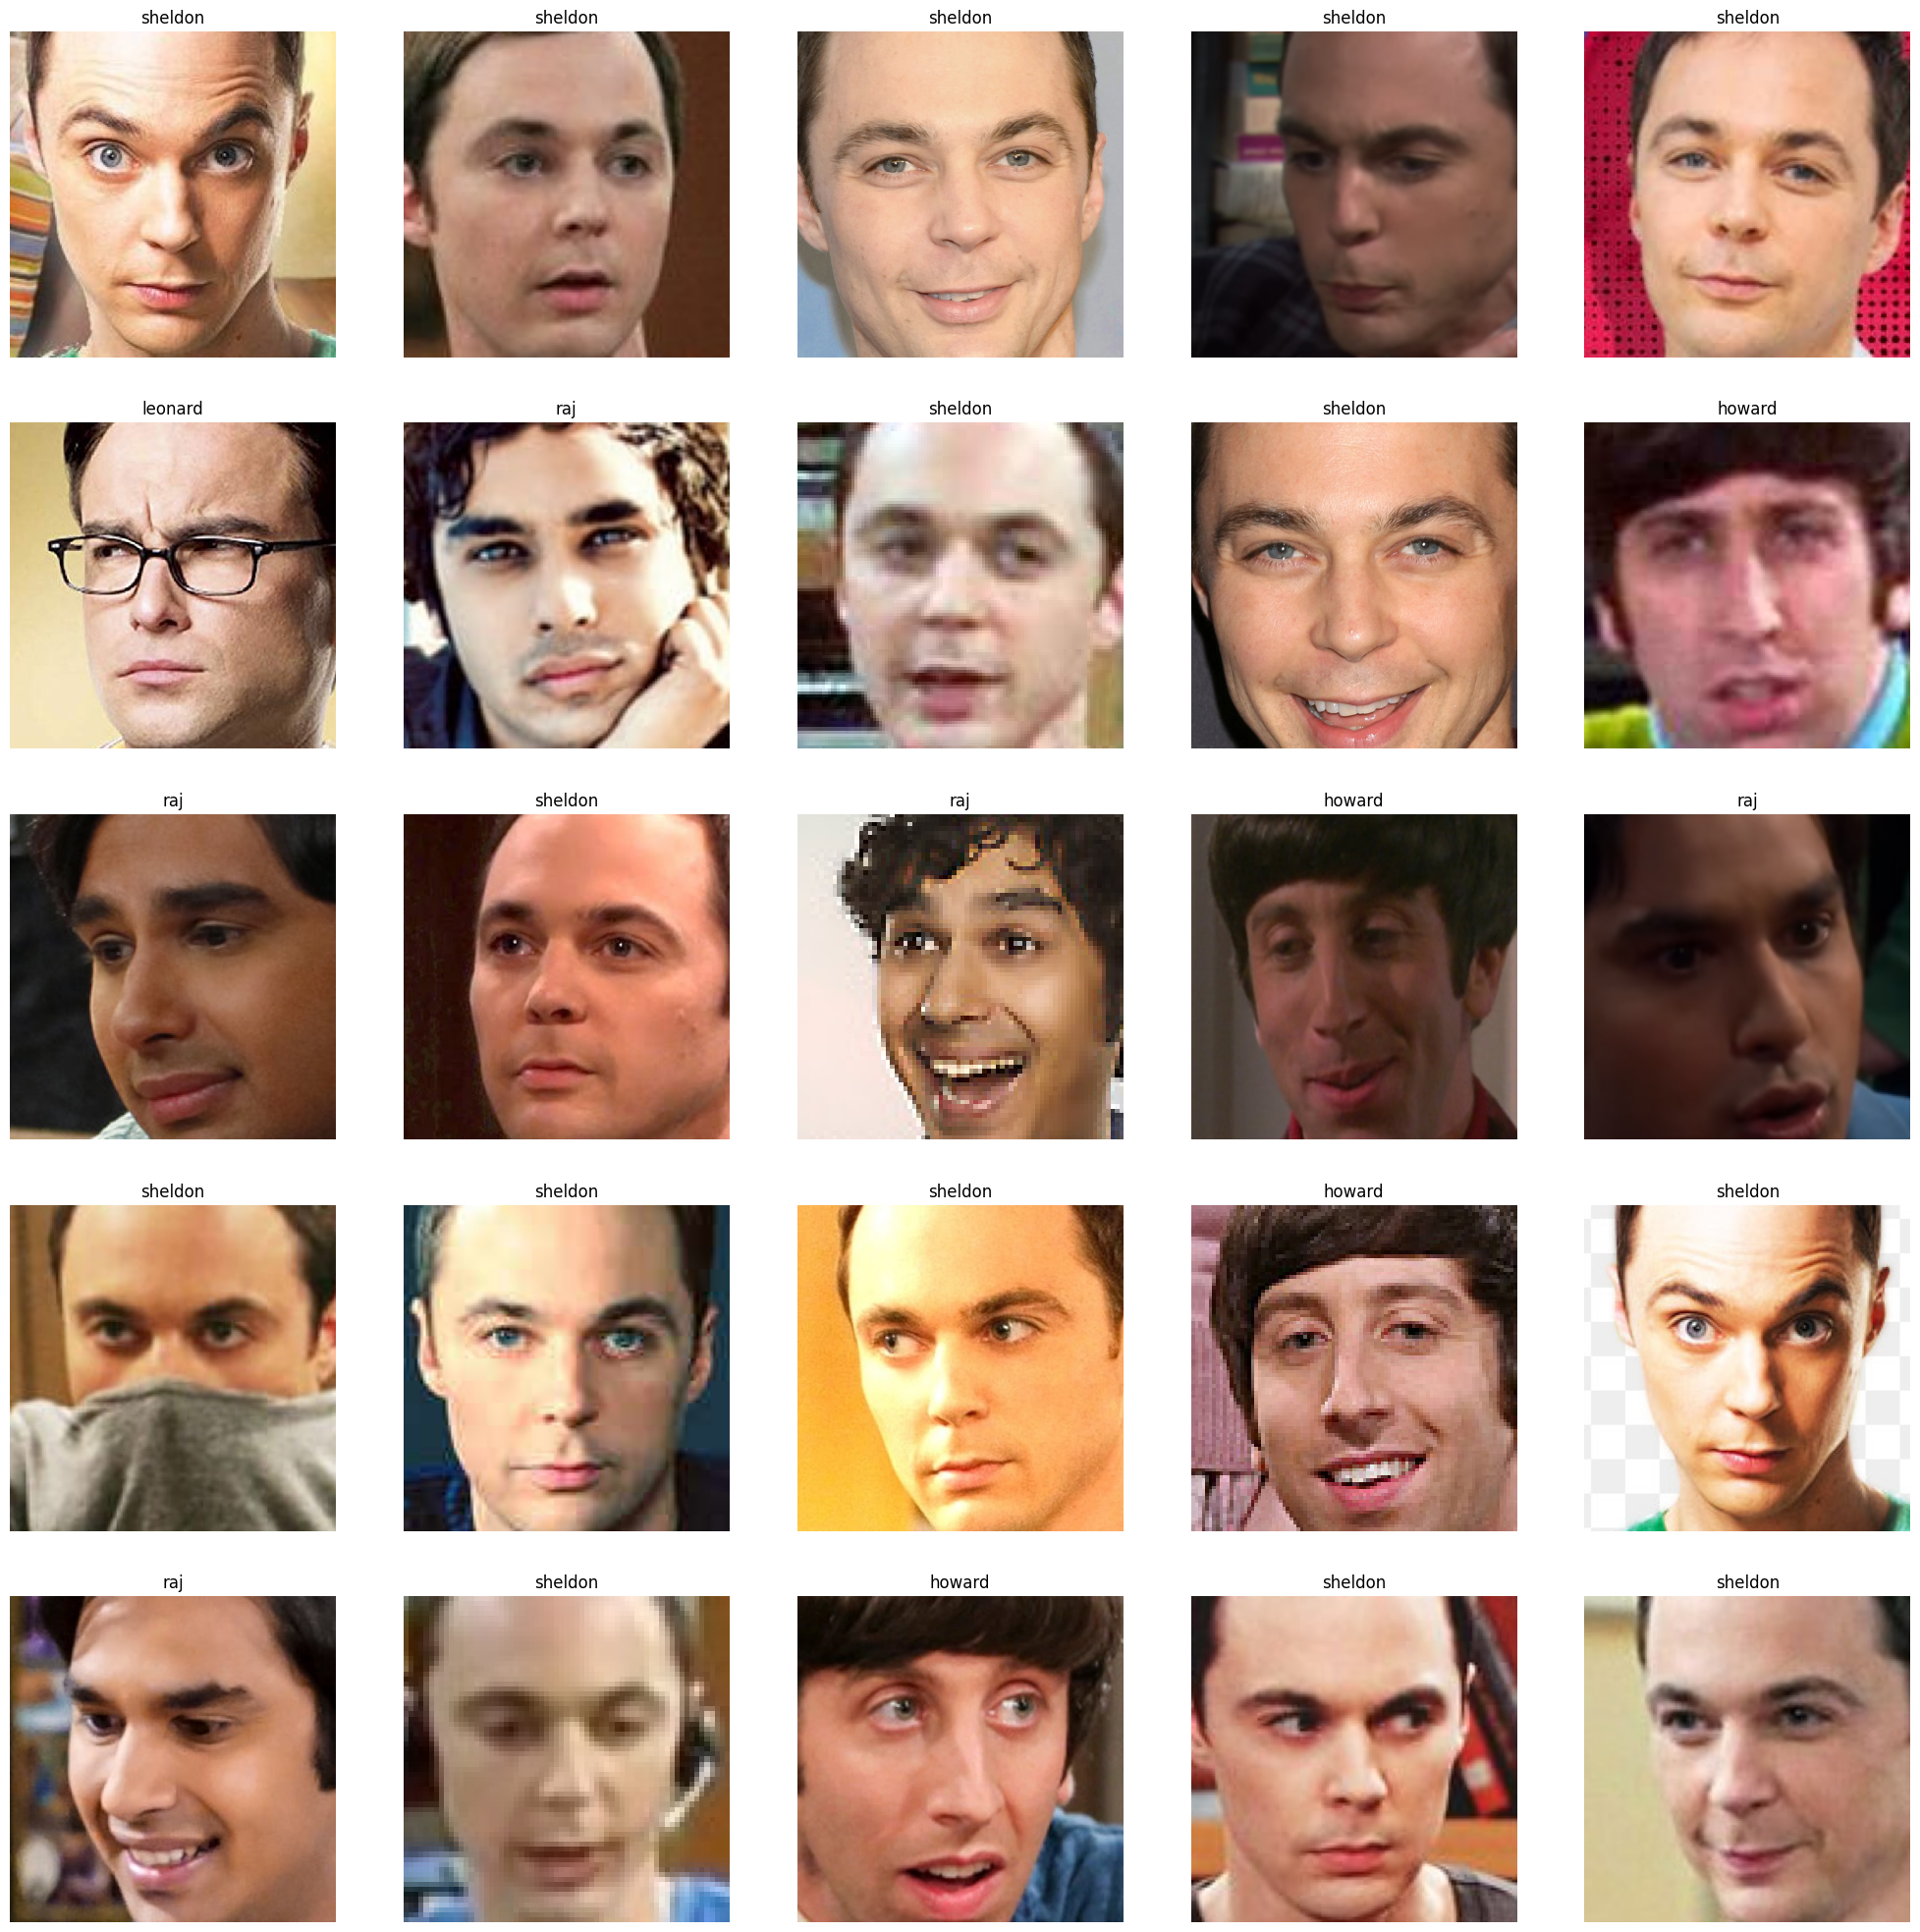

In [27]:
# Display as imagens do datase em grid
plt.figure(figsize=(25, 25))
files = train.iloc[0:25]

for index, file, label in files.itertuples():
    plt.subplot(5, 5, index + 1)
    img = Image.open(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(label)
    plt.axis('off')

In [28]:
def extreact_features(images):
  features = []
  for image in tqdm(images):
    img = cv2.imread(image)
    img = Image.open(image)
    img = np.array(img)
  features.append(img)
  features = features.reshape(len(features), 48, 48, 1)
  return features